In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from tqdm import tqdm
import seaborn as sns
sns.set_palette('hls', 10)

In [2]:
N = 32*32
P = 10
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 25
NO_OF_BITS_TO_CHANGE = 512

In [3]:
def image_to_np(path):
    im = Image.open(path)
#     size = 64, 64
#     im.thumbnail(size, Image.ANTIALIAS)
    im_np = np.asarray(im)
    try:
        im_np = im_np[:, :, 0]
    except IndexError:
        pass
    im_np = np.where(im_np<128, -1, 1)
#     plt.imshow(im_np, cmap='gray')
    im_np = im_np.reshape(N)
    return im_np

In [4]:
PATH = '../data/digits/'

In [5]:
epsilon = np.asarray([image_to_np(os.path.join(PATH, '0.jpg')),
                     image_to_np(os.path.join(PATH, '1.jpg')),
                     image_to_np(os.path.join(PATH, '2.jpg')),
                     image_to_np(os.path.join(PATH, '3.jpg')),
                     image_to_np(os.path.join(PATH, '4.jpg')),
                     image_to_np(os.path.join(PATH, '5.jpg')),
                     image_to_np(os.path.join(PATH, '6.jpg')),
                     image_to_np(os.path.join(PATH, '7.jpg')),
                     image_to_np(os.path.join(PATH, '8.jpg')),
                     image_to_np(os.path.join(PATH, '9.jpg'))])
                    

In [6]:
epsilon

array([[ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1, -1,  1],
       [ 1,  1,  1, ..., -1, -1,  1],
       ...,
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ..., -1, -1,  1]])

In [7]:
epsilon[0].reshape(N_sqrt, N_sqrt)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

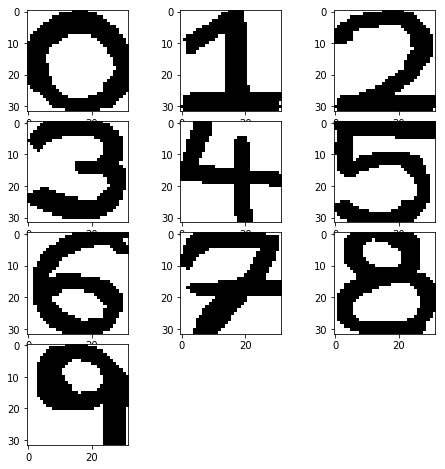

In [8]:
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(epsilon):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

[[ 1 -1 -1 ...  1  1 -1]
 [-1 -1 -1 ...  1  1 -1]
 [-1 -1  1 ... -1 -1 -1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]
 [ 1  1  1 ...  1  1  1]]


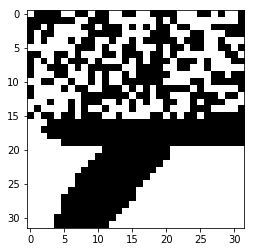

In [9]:
# test_array = image_to_np(os.path.join(PATH, 'test/test1.jpg'))
random_pattern = np.random.randint(P)
test_array = epsilon[random_pattern]
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

print(test_array.reshape(N_sqrt, N_sqrt))
plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

In [10]:
epsilon.shape, test_array.shape

((10, 1024), (1024,))

In [11]:
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(P):
            w[i, j] += (epsilon[p, i]*epsilon[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N
w

100%|██████████| 1024/1024 [00:27<00:00, 37.23it/s]


array([[0.        , 0.0078125 , 0.0078125 , ..., 0.00195312, 0.00195312,
        0.0078125 ],
       [0.0078125 , 0.        , 0.00976562, ..., 0.        , 0.        ,
        0.00585938],
       [0.0078125 , 0.00976562, 0.        , ..., 0.        , 0.        ,
        0.00585938],
       ...,
       [0.00195312, 0.        , 0.        , ..., 0.        , 0.00976562,
        0.00390625],
       [0.00195312, 0.        , 0.        , ..., 0.00976562, 0.        ,
        0.00390625],
       [0.0078125 , 0.00585938, 0.00585938, ..., 0.00390625, 0.00390625,
        0.        ]])

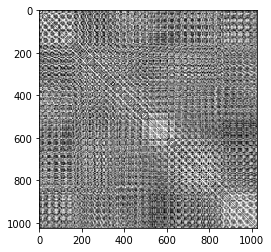

In [12]:
w.shape
plt.imshow(w, cmap='gray')

100%|██████████| 25/25 [00:13<00:00,  1.84it/s]


array([[584., 469., 512., 539., 399., 543., 521., 184., 579., 481.],
       [597., 492., 531., 552., 424., 552., 532.,  63., 568., 468.],
       [602., 501., 526., 549., 439., 545., 519.,  16., 553., 469.],
       [600., 509., 526., 549., 443., 539., 517.,   4., 555., 467.],
       [602., 509., 528., 551., 441., 541., 517.,   2., 555., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 441., 543., 519.,   0., 557., 465.],
       [604., 507., 530., 553., 44

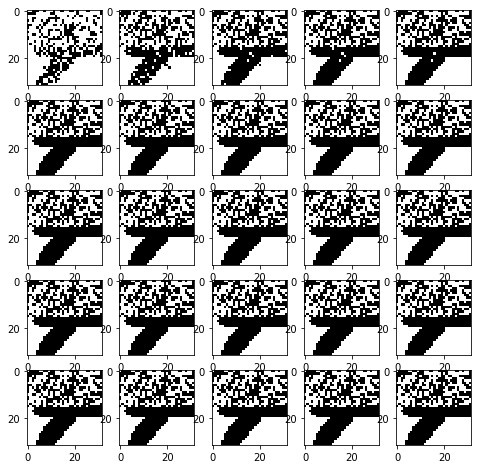

In [13]:
fig = plt.figure(figsize = (8, 8))
hamming_distance = np.zeros((NO_OF_ITERATIONS, P))
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
#     print(test_array.shape)
    for i in range(P):
#         print(iteration)
        hamming_distance[iteration, i] = ((epsilon - test_array)[i]!=0).sum()
    plt.subplot(5, 5,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
hamming_distance

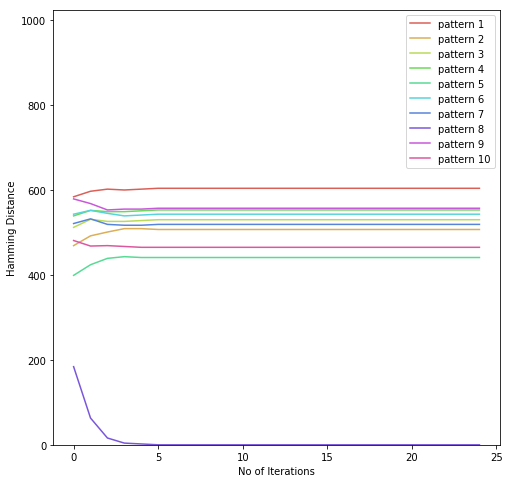

In [15]:
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 1024])
plt.legend(['pattern 1', 'pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6', 'pattern 7', 'pattern 8', 'pattern 9', 'pattern 10'],  loc='best')
plt.show()